In [5]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [74]:
def read(url):
    r = requests.get(url)
    tab = r.text
    xy = []
    skip = 11
    for line in tab.strip().split("\n"):
        if skip:
            skip -= 1
            continue
        items = line.split()
        xi = float(items[3])
        yi = float(items[4])
        yei = (0.5 * sum(float(i) ** 2 for i in items[5:9])) ** 0.5
        xy.append((xi, yi, yei))
    xy.sort(key=lambda p: p[0])
    return np.transpose(xy)

In [75]:
pim_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pimp_total.dat")
pip_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pipp_total.dat")
p_p = read("https://pdg.lbl.gov/2020/hadronic-xsections/rpp2020-pp_total.dat")

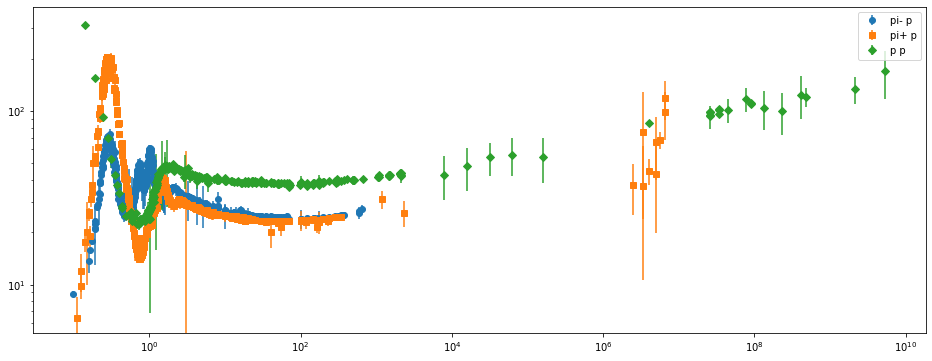

In [82]:
plt.figure(figsize=(16, 6))
plt.errorbar(*pim_p, fmt="o", label="pi- p")
plt.errorbar(*pip_p, fmt="s", label="pi+ p")
plt.errorbar(*p_p, fmt="D", label="p p")
plt.loglog()
plt.legend()

[]

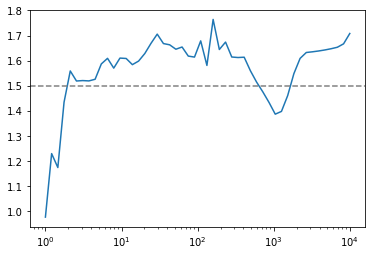

In [61]:
from scipy.interpolate import interp1d
l_pip_p = interp1d(*pip_p)
l_p_p = interp1d(*p_p)
x = np.geomspace(1, 1e4)
plt.plot(x, l_p_p(x) / l_pip_p(x))
plt.axhline(3/2, ls="--", color="0.5")
plt.semilogx()